# 多元回归分析的应用
为了检验美国电力是否存在规模经济，Nerlove(1963)搜集了1955年145家美国电力企业的总成本(TC)、产量(Q)、工资率(PL)、燃料价格(PF)及资本租赁价格(PK)的数据。

|编号|总成本(TC)/百万美元|产量(Q)/千瓦时|工资率(PL)/美元/千瓦时|燃料价格(PF)/美元/千瓦时|资本租赁价格(PK)/美元/千瓦时|
|---|---|---|---|---|---|
|1|0.082|2|2.09|17.9|183|
|2|0.661|3|2.05|35.1|174|
|3|0.990|4|2.05|35.1|171|
|4|0.315|4|1.83|32.2|166|
|5|0.197|5|2.12|28.6|233|
|...|...|...|...|...|...|
|143|73.050|11796|2.12|28.6|148|
|144|139.422|14359|2.31|33.5|212|
|145|119.939|16719|2.30|23.6|162|

试以总成本为因变量，以产量、工资率、燃料价格和资本租赁价格为自变量，利用多元线性回归分析方法研究它们之间的关系。

数据文件为：`datasets/nerlove.csv`

## 1. 观察数据

In [13]:
import pandas as pd
data=pd.read_csv("datasets/nerlove.csv")
data

,总成本TC,产量Q,工资率PL,燃料价格PF,资本租赁价格PK
0,0.082,2,2.09,17.9,183
1,0.661,3,2.05,35.1,174
2,0.990,4,2.05,35.1,171
3,0.315,4,1.83,32.2,166
4,0.197,5,2.12,28.6,233
...,...,...,...,...,...
140,44.894,9956,1.68,28.8,203
141,67.120,11477,2.24,26.5,151
142,73.050,11796,2.12,28.6,148
143,139.422,14359,2.31,33.5,212


In [14]:
data = data.rename(columns = {"总成本TC":"TC",
                              "产量Q":"Q",
                              "工资率PL":"PL",
                              "燃料价格PF":"PF",
                              "资本租赁价格PK":"PK"})
data

,TC,Q,PL,PF,PK
0,0.082,2,2.09,17.9,183
1,0.661,3,2.05,35.1,174
2,0.990,4,2.05,35.1,171
3,0.315,4,1.83,32.2,166
4,0.197,5,2.12,28.6,233
...,...,...,...,...,...
140,44.894,9956,1.68,28.8,203
141,67.120,11477,2.24,26.5,151
142,73.050,11796,2.12,28.6,148
143,139.422,14359,2.31,33.5,212


## 2. 相关性分析

### 2.1 pearson相关系数

在做多元回归之前，我们需要确定因变量（被解释变量）和自变量（解释变量）之间是否存在相关性。使用上一章节学过的pearson相关性检验：

In [25]:
import scipy.stats as stats
print('总成本(TC)和产量(Q)之间的相关系数：', stats.pearsonr(data['TC'], data['Q'])[0])

总成本(TC)和产量(Q)之间的相关系数： 0.9525036987666795


In [26]:
print('总成本(TC)和工资率(PL)之间的相关系数：', stats.pearsonr(data['TC'], data['PL'])[0])
print('总成本(TC)和燃料价格(PF)之间的相关系数：', stats.pearsonr(data['TC'], data['PF'])[0])
print('总成本(TC)和资本租赁价格(PK)之间的相关系数：', stats.pearsonr(data['TC'], data['PK'])[0])

总成本(TC)和工资率(PL)之间的相关系数： 0.2513375371793568
总成本(TC)和燃料价格(PF)之间的相关系数： 0.03393518914410796
总成本(TC)和资本租赁价格(PK)之间的相关系数： 0.02720200044735708


### 2.2 相关系数矩阵

当自变量非常多，有一种更有效率的方法，可以使用`pandas.dataframe.corr()`来计算相关系数矩阵：

In [3]:
data.corr()

,TC,Q,PL,PF,PK
TC,1.000000,0.952504,0.251338,0.033935,0.027202
Q,0.952504,1.000000,0.171450,-0.077349,0.002869
PL,0.251338,0.171450,1.000000,0.313703,-0.178145
PF,0.033935,-0.077349,0.313703,1.000000,0.125428
PK,0.027202,0.002869,-0.178145,0.125428,1.000000


我们使用seaborn来绘制变量和变量之间相关性的热力图，颜色为深色代表相关性越弱，颜色越浅代表相关性越强。接近红色，为正相关，接近蓝色，为负相关。
> seaborn是一个底层基于matplotlib的数据可视化库，它主要用于绘制变量间的统计关系。更多用法请见[官网链接](http://seaborn.pydata.org/index.html)。

<AxesSubplot:>

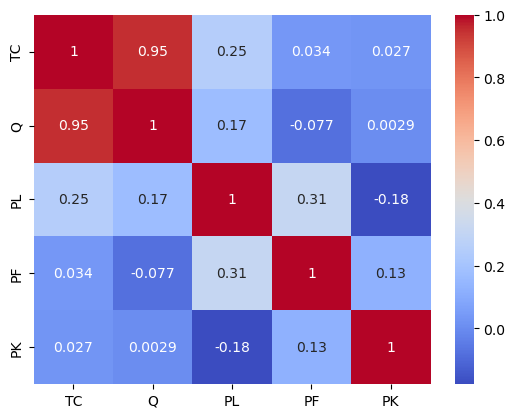

In [7]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

观察上面结果，部分解释变量和解释变量之间存在很高的相关性。

### 2.3 单个自变量和因变量的散点图

绘制散点图观察解释变量和被解释变量之间的相关性，以被解释变量(y)为TC和解释变量(x)为Q为例：

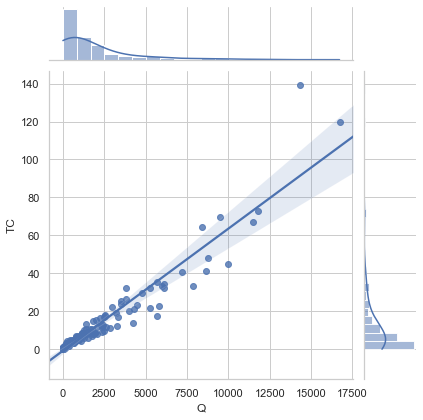

In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid")
g = sns.jointplot(x="Q", y="TC", data=data,
                  kind="reg", truncate=False,
                  height=6)

我们可以用以上命令观察被解释变量TC和其他解释变量之间是否存在相关性。

也可以使用下面这个命令，将解释变量作为横坐标，被解释变量为纵坐标，绘制散点图。

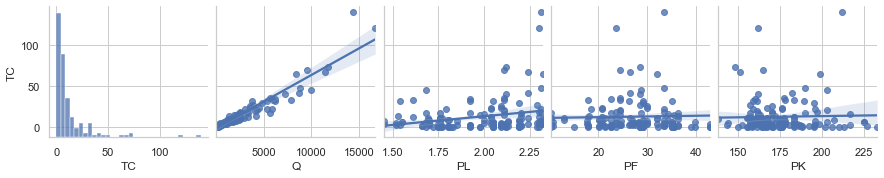

In [59]:
sns.pairplot(data, kind="reg", y_vars=["TC"])

## 3. 多元回归分析

首先，在data中创建新的一列，列名为`Intercept`，值全部为1。目的为之后用OLS估计其系数$\hat{\beta_0}$。

上述回归模型中使用$X$和$y$的数据结构如下，$X$包含多个样本，以及每个样本的属性，也就是自变量，和X的每个样本对应的就是我们的预测目标$y$，也就是因变量。

在实际编程中，一般使用pd.DataFrame来表示$X$和$y$。

![X&y](image/X&y.png)

In [61]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'Q', 'PL', 'PF', 'PK']]
y = data['TC']
x

,Intercept,Q,PL,PF,PK
0,1.0,2,2.09,17.9,183
1,1.0,3,2.05,35.1,174
2,1.0,4,2.05,35.1,171
3,1.0,4,1.83,32.2,166
4,1.0,5,2.12,28.6,233
...,...,...,...,...,...
140,1.0,9956,1.68,28.8,203
141,1.0,11477,2.24,26.5,151
142,1.0,11796,2.12,28.6,148
143,1.0,14359,2.31,33.5,212


下面使用OLS作普通最小二乘，fit方法对回归方程进行估计，summary保存了计算的结果。

In [67]:
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TC   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     418.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           9.26e-77
Time:                        21:29:03   Log-Likelihood:                -452.47
No. Observations:                 145   AIC:                             914.9
Df Residuals:                     140   BIC:                             929.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2210      6.587     -3.373      0.001     -35.245      -9.197
Q              0.0064      0.000     39.258      0.000       0.006       0.007
PL             5.6552      2.176      2.598      0.010       1.352       9.958
PF             0.2078      0.064      3.242      0.001       0.081       0.335
PK             0.0284      0.027      1.073      0.285      -0.024       0.081
==============================================================================
Omnibus:                      135.057   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4737.912
Skew:                           2.907   Prob(JB):                         0.00
Kurtosis:                      30.394   Cond. No.                     5.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![回归结果](image/回归结果.png)

通过观察上面的回归结果：
- 模型的F值F-statistic = 418.1， 对应的P值Prob (F-statistic) = 9.26e-77，说明模型是非常显著的。
- 可见拟合优度R-squared = 0.923，修正的拟合优度Adj.R-squared = 0.921，说明模型的解释能力是很好的。

模型的回归方程为：
$$
TC = -22.2210 + 0.0064\times Q + 5.6552\times PL + 0.2078\times PF + 0.0284\times PK
$$

也就是
$$
电力企业的总成本 = -22.2210 + 0.0064\times 产量 + 5.6552\times 工资率 + 0.2078\times 燃料价格 + 0.0284 \times 资本租赁价格
$$

## 4. 系数$\beta$假设检验

对于解释变量系数$\beta$的假设检验，这里的原假设是系数$\beta=0$，备择假设是系数$\beta\neq 0$。

观察刚才的回归结果，我们看到对于变量Q，其系数$\beta=0$的t统计量为39.258，P值为0.000，P值小于显著性水平alpha=0.05，需要拒绝原假设。说明回归得到系数是显著不为零的。

同样，我们会到结论，PL显著不为零，PF显著不为零。但是变量PK(资本租赁价格)的回归系数的检验结果，t=1.073， P=0.285，P值大于显著性水平alpha=0.05，不能拒绝原假设。

试着剔除变量PK，也就是不包含PK这一列，再次进行多元回归分析，请自行练习。

In [ ]:
data['Intercept'] = 1.
x = data[['Intercept', 'Q', 'PL', 'PF']] 
#这里PK被删除， 原始的x = data[['Intercept', 'Q', 'PL', 'PF', 'PK']]
y = data['TC']

## 5. 结论

根据微观经济学对于【规模经济】的解释，在一定的产量范围内，随着产量的增加，生产的平均成本不断降低。

根据上面的多元回归分析的结果，可以看出，电力企业的总成本(TC)受到产量(Q)、工资率(PL)、燃料价格(PF)的影响，存在规模经济。

例如，保持其他变量不变，增加一个单位的产量(Q)，带来的总成本增加小于一个单位的变化。